#importing neccesary libraries
these are some of the libraries we we be importing others whenever neccesary.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Sample data for testing

data="Microsoft chairman bill gates late wednesday unveiled his vision of the digital lifestyle , outlining the latest version of his windows operating system to be launched later this year"

In [ ]:
data="<body>Microsoft chairman bill gates late wednesday unveiled his vision of the digital lifestyle "

#Text preprocessing:
cleaning the data and converting it into readable format.

converting to lower case

In [ ]:
data = data.lower()
print(data)

<body>microsoft chairman bill gates late wednesday unveiled his vision of the digital lifestyle 


Removing html tags (if any)

In [ ]:
!pip install bs4
from bs4 import BeautifulSoup
#creating all function so that we can use them later on in one place
def removehtml(data) :
    soup = BeautifulSoup(data,'lxml')
    data = soup.get_text()
    return data
print(removehtml(data))
data=removehtml(data)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
microsoft chairman bill gates late wednesday unveiled his vision of the digital lifestyle 


Remaining preprocessing on the text

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install contractions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Expanding Contractions
this part is to expand the contractions like "i'd" to "i would" or "i'll" to i will,i have decided to use the library contraction rather than mapping each contraction as its more accurate. 
references:https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/


In [ ]:
import contractions
data = "I'll be there within five min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends.We've been waiting for this day for so long"
print("data before : \n")
print(data)
data=contractions.fix(data)
print("\ndata after expanding the contractions :\n ")
print(data)
def expandContractions(text):
  text=contractions.fix(text)
  return text

data before : 

I'll be there within five min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends.We've been waiting for this day for so long

data after expanding the contractions :
 
I will be there within five min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends.We have been waiting for this day for so long


In [ ]:
data = "I'll be there within five min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends.We've been waiting for this day for so long"
print("Data before : \n")
print(data)
StopWords = set(stopwords.words('english'))#setting all stopwords
#final function before to preprocess. 
def preprocess_text(text):
    text = text.lower() #converting input to lowercase
    text = removehtml(text) #removing html tags
    text = expandContractions(text) #expanding contractions 
    text = re.sub(r'\([^)]*\)', '', text) #Removing punctuations and special characters.
    text = re.sub('"','', text) #Removing double quotes.  
    text = re.sub(r"'s\b","",text) #Eliminating apostrophe.
    text = re.sub("[^a-zA-Z]", " ", text) #Removing non-alphabetical characters
    text = ' '.join([word for word in text.split() if word not in StopWords]) #Removing stopwords.
    text = ' '.join([word for word in text.split() if len(word) >= 3]) #Removing very short words
    return text
print("\nData after preproccesing :\n")
print(preprocess_text(data))

Data before : 

I'll be there within five min. Shouldn't you be there too? I'd love to see u there my dear. It's awesome to meet new friends.We've been waiting for this day for so long

Data after preproccesing :

within five min would love see dear awesome meet new friends waiting day long


In [ ]:
data= preprocess_text(data)
tokens=data.split()
print(tokens)

['within', 'five', 'min', 'would', 'love', 'see', 'dear', 'awesome', 'meet', 'new', 'friends', 'waiting', 'day', 'long']


#Summary cleaner
very similar to text cleaner with some minor modifications 

In [ ]:
def preprocess_summary(text):
    text = text.lower() #converting input to lowercase
    text = removehtml(text) #removing html tags
    text = expandContractions(text) #expanding contractions 
    text = re.sub(r'\([^)]*\)', '', text) #Removing punctuations and special characters.
    text = re.sub('"','', text) #Removing double quotes.  
    text = re.sub(r"'s\b","",text) #Eliminating apostrophe.
    text = re.sub("[^a-zA-Z]", " ", text) #Removing non-alphabetical characters
    text = ' '.join([word for word in text.split() if word not in StopWords]) #Removing stopwords.
    text = ' '.join([word for word in text.split() if len(word) >= 3]) #Removing very short words
    return text

#Data set used 
here we are using a data set of CNN daily mail data set, in particular i am using the test.csv(49 MB) that contains around 11k instances of data ,i am splitting this data to train and also to test,
source="https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail" 

In [ ]:
!pip install pandas
import pandas as pd
data = pd.read_csv('test.csv',nrows=1000)
print(data)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                                           id  \
0    92c514c913c0bdfe25341af9fd72b29db544099b   
1    2003841c7dc0e7c5b1a248f9cd536d727f27a45a   
2    91b7d2311527f5c2b63a65ca98d21d9c92485149   
3    caabf9cbdf96eb1410295a673e953d304391bfbb   
4    3da746a7d9afcaa659088c8366ef6347fe6b53ea   
..                                        ...   
995  b8504230c7647905078698183f2dda0ce11b8182   
996  8f87f30d3cd9eb25ca0759e0dad11befce3f898c   
997  788350d50e6858fddaf1095b9ac026d82fae79c1   
998  76faa51c29068226495bdaf2d928f176e7d3b8f5   
999  594fb7e9ef4a593d8d13807cfeabd6c5c3253a07   

                                               article  \
0    Ever noticed how plane seats appear to be gett...   
1    A drunk teenage boy had to be rescued by secur...   
2    Dougie Freedman is on the verge of agreeing a ...   
3    Liverpool target Neto is also wanted by PSG an...   
4    Bruce Jenner will

#Data info
we use the function .info() to get the details of the dataframe,i.e no_rows ,no_colums, all the columns,datatype in each column etc.
this helps in manipulating the data easily

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   article     1000 non-null   object
 2   highlights  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None


As you can see there are three columns pertaining to id,article,highlights we as going to use article as the text and the highlights as summary. 

# Cleaning the data (preprocessing)
since we have already defined functions for this ,we are just going to implement them and store it in two lists ,cleaned_text and cleaned_summary.

In [ ]:
cleaned_text = []
for t in data['article']:
    cleaned_text.append(preprocess_text(t))
#to check if its working properly
print(cleaned_text[:2])

cleaned_summary = []

for t in data['highlights']:
  cleaned_summary.append(preprocess_summary(t))

#to check if its working properly
print(cleaned_summary[:2])



['ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortable putting health safety danger squabbling arm rest shrinking space planes putting health safety danger week consumer advisory group set department transportation said public hearing government happy set standards animals flying planes stipulate minimum amount space humans world animals rights space food humans said charlie leocha consumer representative committee time dot faa take stand humane treatment passengers could crowding planes lead serious issues fighting space overhead lockers crashing elbows seat back kicking tests conducted faa use planes inch pitch standard airlines decreased many economy seats united airlines inches room airlines offer little inches cynthia corbertt human factors researcher federal aviation administration conducts tests quickly passengers leave plane tests cond

Adding the data into dataframe

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

#Setting up max limits for the summary and article
setting up limits to the data and adding it back to the dataframe "data"  we are approximating the max_length of the summaries and the text
i have chosen this max text length as 250 even though average length is 750 as my model was taking a lot of time to train 

In [ ]:
max_text_len=250
max_summary_len=50

Remove empty data

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [ ]:
# converting to arrays using numpy for further use as the arguments of many functions prefer arrays
#also to use for loops we need to convert it into array
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])


#new temp list with max limits 
temp_text=[]
temp_summary=[]

for i in range(len(cleaned_text)):
    if( len(cleaned_text[i].split())<=max_text_len  and len(cleaned_summary[i].split())<=max_summary_len):
        temp_text.append(cleaned_text[i])
        temp_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':temp_text,'summary':temp_summary})

adding start and end tags in summary ,these tokens can never come in the articles i am using "sostok" and "eostok" ,i am using these phrases as they arent real english words

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

#splitting the data
Splitting the data into 80% to 20% i.e 80% for training ,20% for testing
i have used train_test_split from the library sklearn.model_selection
random state = 0 this will divide the code in the same way each time important for code reproducibility.  

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.2,random_state=0,shuffle=True) 


#Tokenization
builds the vocabulary 
convert the word into numeric sequences

In [ ]:
# i am using keras to implement tokeniser 
from keras.preprocessing.text import Tokenizer 
from keras.utils import pad_sequences
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

thresh=3 #this implies if word appear less than three words then they are rare 

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    



creating the library

In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary 
x_voc   =  x_tokenizer.num_words + 1


In [ ]:
print(x_voc)#print the number of words in the vocabulary

3675


#Summary Tokeniser

In [ ]:
#prepare a tokenizer for reviews on training data
#very similar to the article 
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))



thresh=6# less than 6 is rare word,as the data size is less

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1




Here, I am deleting the rows that contain only START and END tokens
basically empty columns ,if the data is from verified sources this part is redundant


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)



#Attention Layer 

Here we are using a already implemented attention layer based on the paper Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf)
source='https://github.com/thushv89/attention_keras/blob/master/src/layers/attention.py'

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

#Model Buliding 
we will be implementing a encoder decoder architectiure with stacked LSTM'S(3 in particular) that also has attention layer(Transformer)

importing all the libraries

In [ ]:
#@title Importing all the neccesary libraries 
from keras.preprocessing.text import Tokenizer 
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#@title Model buildling
from keras import backend as K 
K.clear_session()

#i have tried different combinations of values this optimal combination for the model
latent_dim = 300
embedding_dim=200
#the dimensions for the latent space and embedding layer respectively.

# Encoder 
encoder_inputs = Input(shape=(max_text_len,))


#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#these are the three LSTM layers in the encoder. They have the same dimensionality and use dropout and recurrent dropout regularization.
#lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
#attn_layer is the attention layer that calculates the attention weights and the attention context vector.
#attn_out is the attention context vector, and attn_states are the attention weights.

attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# dense layer
#is the dense layer that produces the output probabilities for each token in the target vocabulary.
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
# model is defined as the Keras model with encoder_inputs and decoder_inputs as inputs and decoder_outputs as the output.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# the model is summarized.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 250, 200)     735000      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 250, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              


Sections of the model
 
    
   

*   Encoder- Encoder_inputs is used in order to encode the words into numeric data for processing by LSTM layers.
*   LSTM Layers- We use 3 LSTM layers in order to process the data effectively. You can also experiment by adding or removing the layers in order to find more better accuracies. return_sequences in LSTM layer is set true until we want to add more layers consecutively.
*    Decoder- Decoder again converts the numeric data into the understandable word formats.
*     Attention layer has been added to selectively focus on relevant information while discarding non-useful information. This is done by cognitively mapping the generated sentences with the inputs of the encoder layer.

*   Dense layer has been added to mathematically represent the matrix-vector multiplication in neurons. It is used to change the dimensions of the vectors for processing between various layers.





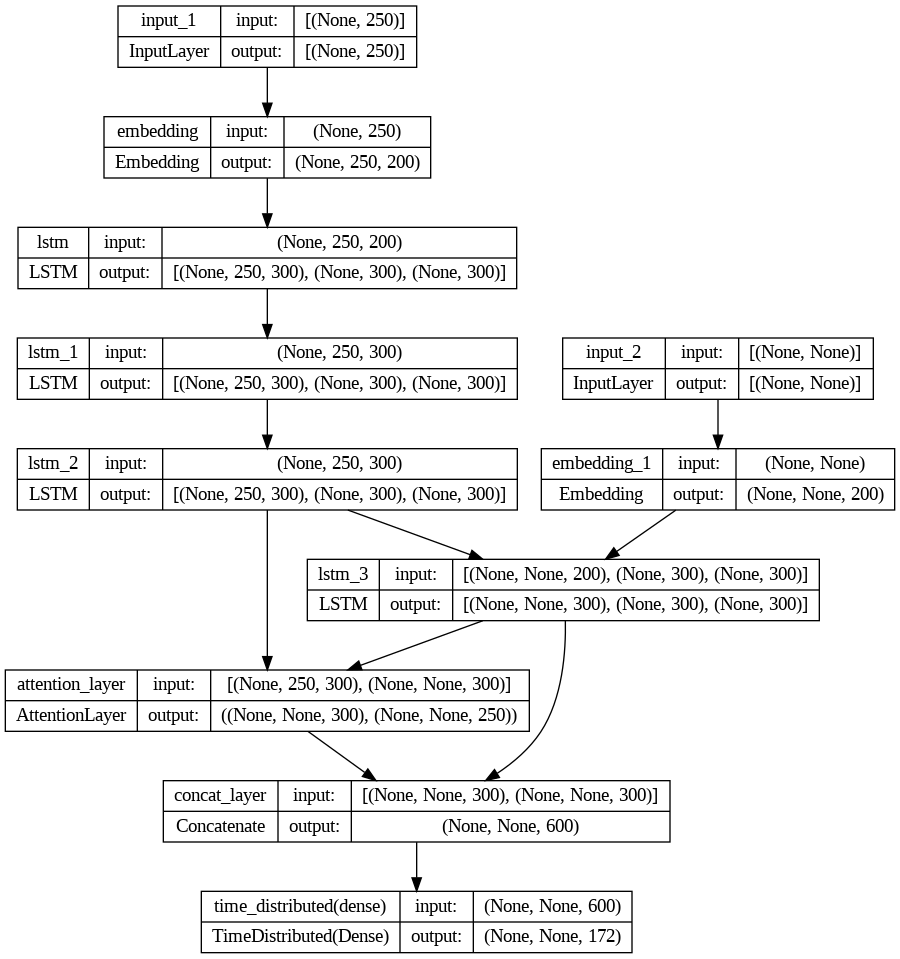

In [ ]:
#@title Visualising the Model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)  


Data loss function

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

 Our model will stop training once the validation loss increases


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
#@title Training the model with 90% of our dataset
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=150, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
2/2 [==============================] - 34s 12s/step - loss: 5.0220 - val_loss: 3.4526
Epoch 2/50
2/2 [==============================] - 14s 4s/step - loss: 2.6975 - val_loss: 4.4704
Epoch 3/50
2/2 [==============================] - 9s 4s/step - loss: 3.1828 - val_loss: 0.8408
Epoch 4/50
2/2 [==============================] - 9s 5s/step - loss: 1.0248 - val_loss: 0.8252
Epoch 5/50
2/2 [==============================] - 7s 4s/step - loss: 1.0061 - val_loss: 0.8150
Epoch 6/50
2/2 [==============================] - 9s 4s/step - loss: 0.9948 - val_loss: 0.8055
Epoch 7/50
2/2 [==============================] - 9s 5s/step - loss: 0.9863 - val_loss: 0.7978
Epoch 8/50
2/2 [==============================] - 7s 4s/step - loss: 0.9791 - val_loss: 0.7930
Epoch 9/50
2/2 [==============================] - 9s 4s/step - loss: 0.9734 - val_loss: 0.7957
Epoch 10/50
2/2 [==============================] - 9s 5s/step - loss: 0.9680 - val_loss: 0.7907
Epoch 11/50
2/2 [=============================

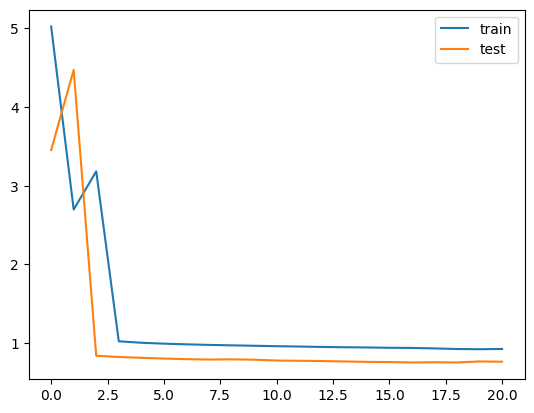

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

building the dictionary to convert the index to word for target and source vocabulary

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index


In [ ]:
#@title Decode sequence

#Define the encoder model to get the feature vector from the input sequence
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Create input tensors to hold the states from the previous time step and the hidden state of the encoder output
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 


# set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Use a dense softmax layer to generate a probability distribution over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Define the final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c], [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_sequence):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_sequence)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # print(sampled_token_index)
        # print(reverse_target_word_index)
        
        sampled_token_index = sampled_token_index+1
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print(sampled_token)

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_summary_len-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

Decode the decoder sequence for text generation and convert the integer sequence into word sequence for summary.

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,10):
    print("Original Article:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_text_len)))
    print("\n")


Original Article: woman arrested wednesday allegedly hit year old boyfriend face hard knocked one contact florida charged domestic violence battery battery person years old victim released county office told elderly man called police told face twice contact battery charge florida charged domestic violence battery battery person years old multiple drug charges pictured two separate last year arrested possession claims much older body argument man told police heated argument friend spending time alleged victim told police dating months adding living together two months first time arrested according public arrest records taken march last year possession officer april last year charged possession august last year arrested taken failure appear court arrested failure appear charge january year failure appear pictured year last year charged failure appear court 
Original summary: charged years old one police arrested five also court 
1/1 [==============================] - 0s 33ms/step
Predict

#ROUGE METRICS
Recall-Oriented Understudy for Gisting Evaluation (ROUGE)

here i am using the rouge metrics to evaluate my model

In [ ]:
!pip install rouge
from rouge import Rouge 
ROUGE=Rouge()

temp1 = seq2summary(y_val[0])
temp2 = decode_sequence(x_val[0].reshape(1,max_text_len))
ROUGE.get_scores(temp2, temp1, avg=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1/1 [==============================] - 0s 23ms/step


{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0},
 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}

my model is underperforming and i suspect it may be due to the sheer size of the data set i am using or some issue with the embeddings i have tried a lot of ways to come up with ways to to improve the mode but i have not recieved any significant improvement